# Reference Points
Challenge 3 (Fourth challenge)

Find below, link to Stack Overflow Annual Developer Survey. Grab the 2020 survey result. That's what we are working with here.

The Tasks:

- How many developers participated in this survey?
- Find the top 10 countries participating devs are from.
- How many are from Nigeria?
- What's the average age the Nigerian dev wrote their first code?
- What's the average age of the Nigerian dev?
- What are the kinds of employment they are in?
- What's the gender distribution?
- What majors did they study in school?
- What languages have they worked with?
- What's the average number of languages they have worked with?
- What's the average number of years of experience of the Nigerian developer?
- #Kicker
- 1. How many devs are women, age below 25 and earn a living from dev?
- 2. What are the 10 most popular languages among Naija devs?

In [24]:
# Import needed libraries
import pandas as pd
import statistics

from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [25]:
#Read dataset
df = pd.read_csv('survey_results_public.csv')

In [26]:
#Summary stats
df.shape

(64461, 61)

In [27]:
#Just like python as a whole, in pandas, if you do not know the type you ar working with, you are in for undue stress
#Remember these types as we might wanna do things to them to whip them into the type to do well
df.dtypes

Respondent              int64
MainBranch             object
Hobbyist               object
Age                   float64
Age1stCode             object
                       ...   
WebframeWorkedWith     object
WelcomeChange          object
WorkWeekHrs           float64
YearsCode              object
YearsCodePro           object
Length: 61, dtype: object

In [28]:
#I like to beware of the features/columns I am working with
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

**How many developers participated in this survey?**

In [29]:
#By simple logic, since this is a developers' survey, all participants are developers
#So we simple return the 'height' of the dataset.
print(f"A total of {df.shape[0]:,} developers participated in the survey")

A total of 64,461 developers participated in the survey


**Find the top 10 countries participating devs are from.**

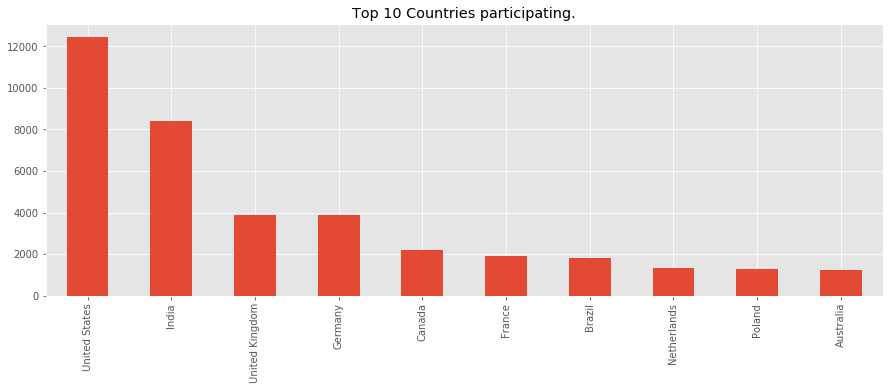

In [30]:
#We will just quickly drop a plot on value_counts of the country column
df.Country.value_counts().head(10).plot(kind='bar', figsize =(15,5), title="Top 10 Countries participating.")

**How many are from Nigeria?**

In [31]:
#Because the rest of the questions are on Nigeria, I will make a naija df
#filter out Nigeria observations into 'naija'
naija = df[df['Country'] == 'Nigeria'].reset_index(drop=True)

#Same operation on the whole dataset or participants works here too
print(f"A total of {naija.shape[0]} Nigerian developers participated in the survey")

A total of 593 Nigerian developers participated in the survey


**What's the average age the Nigerian dev wrote their first code?**

In [32]:
#How do you feel about one liners? I love them!
#One thing I like doing is using python lists as much as I'm able to
#It's flexible and being a basic building block, it's to remember and manipulate extensively
#Types! Here I convert the col in view to a list of ints and find the mean
age1stcode = [int(line) for line in naija.Age1stCode.tolist() if type(line) == str]
print(f"Average age at first code for Nigerians is {round(statistics.mean(age1stcode),1)} Years.")

Average age at first code for Nigerians is 19.9 Years.


**What's the average age of the Nigerian dev?**

In [33]:
#Since I have already done some EDA, I know some of the rows hold nothing
#So something creative needs come in here:  enter python list operation
#We will on find the average age of all that declared an age.
ages = []
for age in naija.Age:
    try:
        x = int(age)
        ages.append(x)
    except:
        pass
    
print(f"Average age of Nigerian devs is {round(statistics.mean(ages),1)} Years.")

Average age of Nigerian devs is 25.7 Years.


**What are the kinds of employment they are in?**

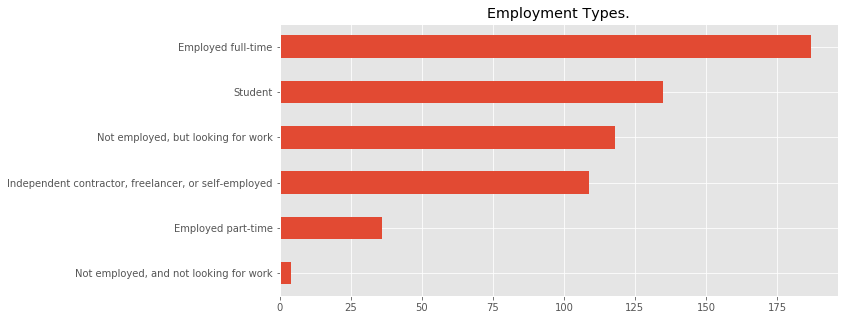

In [34]:
#Let's count values in the appropriate columns
#Since we expect a long names, we do a horizontal bar
naija.Employment.value_counts().sort_values().plot(kind='barh', figsize =(10,5), title="Employment Types.")

**What's the gender distribution?**

In [35]:
#We will take two approaches here
#1. All possible distribution of gender on the list. Notice the NaNs
naija.Gender.value_counts(dropna=False)

Man                                                  408
NaN                                                  151
Woman                                                 31
Woman;Man                                              2
Non-binary, genderqueer, or gender non-conforming      1
Name: Gender, dtype: int64

In [36]:
#2. Only three category of items on the list: male, female and others
#Following the outcome above, we count men, women and others
male, female, others = 0, 0, 0
for line in naija.Gender:
    if line == 'Woman':
        female += 1
    elif line == 'Man':
        male += 1
    else:
        others += 1
        
print(f"There are {male} males, {female} females and  {others} others")

There are 408 males, 31 females and  154 others


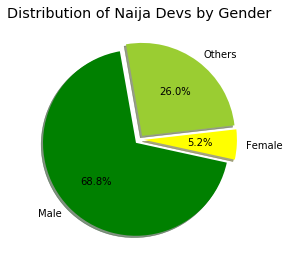

In [37]:
#Share of a whole are best shown on pie charts. Let's plot.
# Data to plot
labels = ['Male', 'Female', 'Others']
sizes = [male, female, others]
colors = ['green', 'yellow', 'yellowgreen']
explode = (0.05, 0.05, 0.05)  # explode 1st slice

# Plot
# patches, texts = plt.pie(sizes, explode=explode, autopct='%1.2f%%', colors=colors,shadow=True, startangle=120)
plt.title("Distribution of Naija Devs by Gender")
plt.tight_layout()

# Plot with labels and percentage
plt.pie(sizes, labels=labels,autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=100)
plt.show()

**What majors did they study in school?**

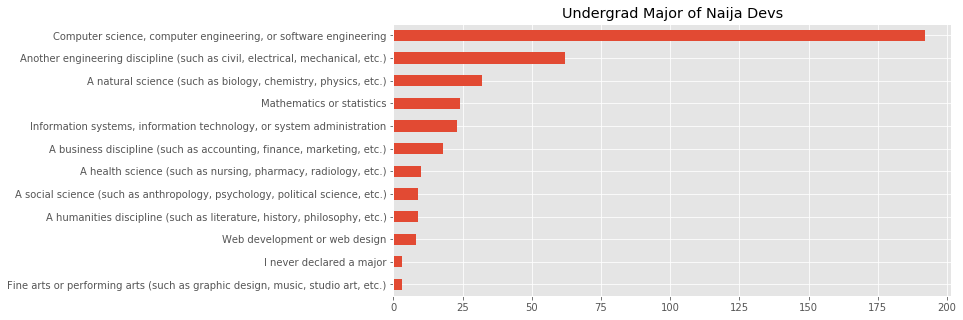

In [38]:
#Value counts, again, is so instrumental
naija.UndergradMajor.value_counts().sort_values().plot(kind='barh', figsize =(10,5), title="Undergrad Major of Naija Devs")

**What languages have they worked with?**

In [39]:
#One migh tbe tempted to do a value_counts here but wait.
#For perspecive, below is value counts: This is along a combination of languages
#We need the languages individually and we will show the top ten
naija.LanguageWorkedWith.value_counts(dropna=False)

NaN                                                87
HTML/CSS;JavaScript                                36
HTML/CSS;JavaScript;PHP;SQL                        28
HTML/CSS;JavaScript;PHP                            16
HTML/CSS;JavaScript;TypeScript                     14
                                                   ..
C;C#;C++;HTML/CSS;Java;JavaScript;Python            1
C#;HTML/CSS;Java;JavaScript;PHP;Python;Ruby;SQL     1
Dart;HTML/CSS;PHP;SQL                               1
HTML/CSS;Java;JavaScript;Python;TypeScript          1
Dart;HTML/CSS;JavaScript;PHP;Python;SQL             1
Name: LanguageWorkedWith, Length: 271, dtype: int64

In [40]:
#Let's ignore the NaNs and plot the top 10 languages they have worked with
#First we collate the languages
#I will do two things here: observation is key
#Notice that the langauges here are seperated with semicolons. Handy!
#Step 1. Count all instances. For good measure, will count the NaNs to collaborate the number above
NaNs = 0
no_lang = []
for line in naija.LanguageWorkedWith:
    try:#If this works we hae some values around, else, it's NaN, count it
        x = line.split(';') #split() returns a list, we unpack them into the no_lang with extend
        no_lang.extend(x)
    except:
        NaNs += 1
        
print(f"There are {NaNs} NaNs")
print(f"There are {len(no_lang):,} langauges on the list.")

There are 87 NaNs
There are 2,112 langauges on the list.


In [41]:
#Step 2: Expect many instances of the same language in no_lang? Of course. See length above and below
#Let's make the members of that collection unique and also take their count. Python dictionary
languages = {}
for line in no_lang:
    if line in languages.keys():
        languages[line][0] += 1 #Yea. thats strange. It's on purpose. reason in  next cell
    else:
        languages[line] = [1]
        
#Rememebr the count of languages in no_lang, see whats unique now, held in a languages.keys
print(f"There are {len(languages.keys())} unique languages on the list")

There are 24 unique languages on the list


In [42]:
#Remember the odd move up there? Aim was to have value made up of python lists
#Why the hassle? Well, we want a quick dataframe
languages_df = pd.DataFrame(languages) #Smooth right. but why?

#remember our question: top 10 most used langauges. With a df, value_counts beautifully delivers
#First we transpose the df and then do value_counts
df = languages_df.T.reset_index() #tranpose
df.columns = ['languages', 'count'] #rename cols
df.sort_values('count', ascending=False).reset_index(drop=True).head(10)

,languages,count
0,HTML/CSS,395
1,JavaScript,366
2,SQL,242
3,PHP,218
4,Python,192
5,Java,174
6,C#,100
7,TypeScript,86
8,C++,74
9,C,52


**What's the average number of languages they have worked with?**

In [43]:
#PS: pandas NaNs are of type float
#We count how many languages each is doing
all_langages_count = [len(line.split(';')) for line in naija .LanguageWorkedWith if type(line) != float]

#Take the average
print(f"Average number of languages they have worked with is {round(statistics.mean(all_langages_count),1)}")

Average number of languages they have worked with is 4.2


**What's the average number of years of experience of the Nigerian developer?**

In [44]:
#A value counts shows me the distibution of things so I know how to proceed
naija.YearsCode.value_counts(dropna=False)

NaN                 86
3                   81
2                   71
5                   56
4                   49
6                   38
8                   34
1                   32
Less than 1 year    28
10                  27
7                   26
9                   20
11                  11
12                   8
20                   5
15                   4
14                   4
18                   3
13                   3
23                   3
37                   1
26                   1
17                   1
16                   1
Name: YearsCode, dtype: int64

In [45]:
#For the observations 'less than 1 year', we are going to call them 1 year
#List!
years = []
for line in naija.YearsCode:
    if line == 'Less than 1 year':
        years.append(1)
    else:
        try:
            x = int(line) #If it fails, it is a nan value: bone am
            years.append(x)
        except:
            pass
        
#Now let's print out the average number of years of experience 
print(f"Average number of years of experience of Nigerian devs is {round(statistics.mean(years),1)} Years.")

Average number of years of experience of Nigerian devs is 5.4 Years.


# Kicker

**1. How many devs are women, age below 25 and earn a living from dev?**

In [46]:
#Slice out the naija set that are below 25, women and earning
naija[(naija['Age'] < 25) & (naija['Gender'] == 'Woman' ) & (naija['CompTotal'] > 0 )]

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
309,50414,I am a developer by profession,Yes,23.0,21,Monthly,210000.0,6912.0,Nigeria,Nigerian naira,...,Easy,Appropriate in length,No,Mathematics or statistics,Gatsby;Ruby on Rails,Express;Flask;React.js,A lot more welcome now than last year,40.0,2,1
